In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Genre Classification Dataset/train_data.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [3]:
train_data

movie          genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             description  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past incestuous r...  
3       As the bus empties the students for their fie...  
4       To help their unemployed father make ends mee...  
5       The film's title refers not only to the un-re...  
...                                                  ...  
54210   This short-lived NBC live sitcom centered on ...  
54211   The NEXT Generation of EXPLOITATION. The sist...  
54212   Ze bestaan echt, is a stand-up comedy about g...  
54213   Walter and Vivian live in the country and hav...  
54214   On Labor Day Weekend, 1935, the most intense ...  

[54214 rows x 3 columns]

In [4]:
test_data = pd.read_csv("Genre Classification Dataset/test_data_solution.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [5]:
test_data

movie          genre  \
1                 Edgar's Lunch (1998)       thriller    
2             La guerra de papá (1977)         comedy    
3          Off the Beaten Track (2010)    documentary    
4               Meu Amigo Hindu (2015)          drama    
5                    Er nu zhai (1955)          drama    
...                                 ...            ...   
54196   "Tales of Light & Dark" (2013)         horror    
54197      Der letzte Mohikaner (1965)        western    
54198              Oliver Twink (2007)          adult    
54199                Slipstream (1973)          drama    
54200        Curitiba Zero Grau (2010)          drama    

                                             description  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn't spoken with hi...  
5       Before he was known internationally as a mart...  
...                                                  ...  
54196   Covering multiple genres, Tales of Light & Da...  
54197   As Alice and Cora Munro attempt to find their...  
54198   A movie 169 years in the making. Oliver Twist...  
54199   Popular, but mysterious rock D.J Mike Mallard...  
54200   Curitiba is a city in movement, with rhythms ...  

[54200 rows x 3 columns]

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string

stopwords=set(stopwords.words('english'))
stemmer=PorterStemmer()


In [7]:

def clean(text):
    text=re.sub(r'/W',' ',text)
    text=re.sub(r'http\+S',' ',text)
    tokens=word_tokenize(text.lower())
    stemmed_words=[stemmer.stem(token) for token in tokens if token.isalpha() and token not in stopwords]
    return " ".join(stemmed_words)
    

In [8]:
train_data['description']=train_data['description'].apply(clean)
test_data['description']=test_data['description'].apply(clean)

In [9]:
train_data

movie          genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             description  
1      listen convers doctor parent oscar learn nobod...  
2      brother sister past incestu relationship curre...  
3      bu empti student field trip museum natur histo...  
4      help unemploy father make end meet edith twin ...  
5      film titl refer bodi ground zero also state na...  
...                                                  ...  
54210  nbc live sitcom center bonino concert singer l...  
54211  next gener exploit sister kapa bay soror hous ...  
54212  ze bestaan echt comedi grow face fear freer or...  
54213  walter vivian live countri difficult time keep...  
54214  labor day weekend intens hurrican ever make la...  

[54214 rows x 3 columns]

In [10]:
test_data

movie          genre  \
1                 Edgar's Lunch (1998)       thriller    
2             La guerra de papá (1977)         comedy    
3          Off the Beaten Track (2010)    documentary    
4               Meu Amigo Hindu (2015)          drama    
5                    Er nu zhai (1955)          drama    
...                                 ...            ...   
54196   "Tales of Light & Dark" (2013)         horror    
54197      Der letzte Mohikaner (1965)        western    
54198              Oliver Twink (2007)          adult    
54199                Slipstream (1973)          drama    
54200        Curitiba Zero Grau (2010)          drama    

                                             description  
1      brane love life car apart job especi girlfrien...  
2      spain march quico naughti child three belong w...  
3      one year life albin famili shepherd north tran...  
4      father die spoken brother year seriou cancer d...  
5      known intern martial art superstar bruce lee a...  
...                                                  ...  
54196  cover multipl genr tale light dark antholog we...  
54197  alic cora munro attempt find father british of...  
54198  movi year make oliv twist art dodger fagin lov...  
54199  popular mysteri rock mike mallard askew broadc...  
54200  curitiba citi movement rhythm differ pulsat gr...  

[54200 rows x 3 columns]

In [11]:
def barplot(data):
    genre_value_counts=data['genre'].value_counts()
    plt.figure(figsize=(12,8))
    genre_value_counts.plot(kind='bar')
    plt.title='Distribution of Movies Genre'
    plt.xlabel='Genre' 
    plt.ylabel='No. of Movies'
    plt.xticks(rotation=45)
    plt.show
    

In [12]:
train_data.to_csv('cleaned_train.csv')

In [13]:
test_data.to_csv('cleaned_test.csv')

In [14]:
#removing white trails

In [15]:
train_data['genre']=train_data['genre'].str.strip()
test_data['genre']=test_data['genre'].str.strip()

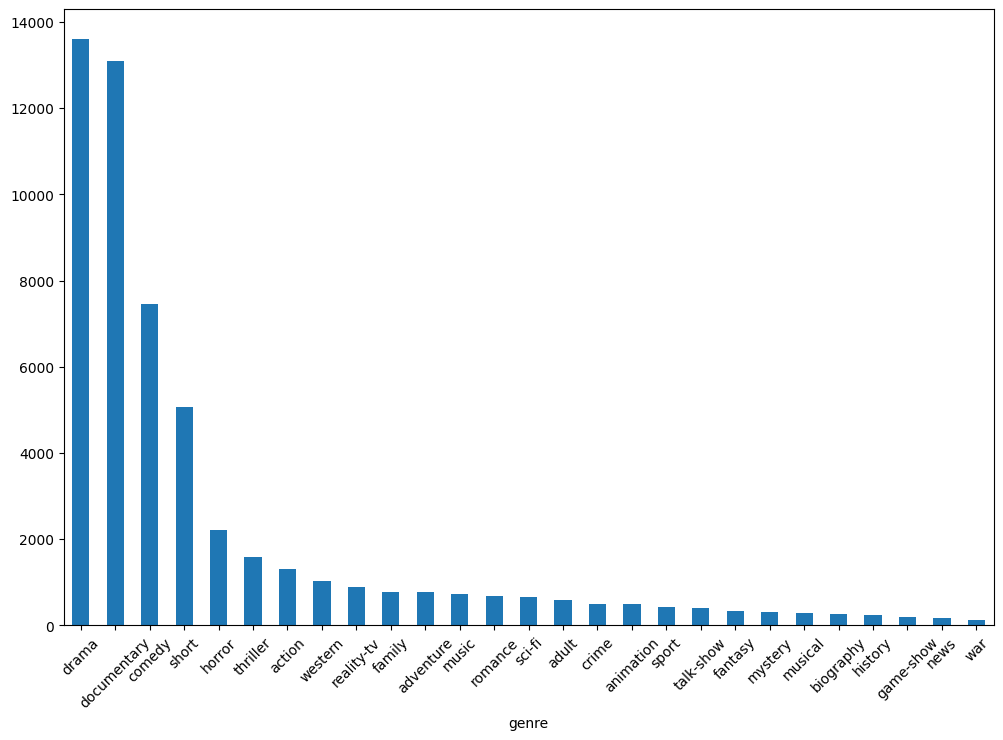

In [16]:
barplot(train_data)

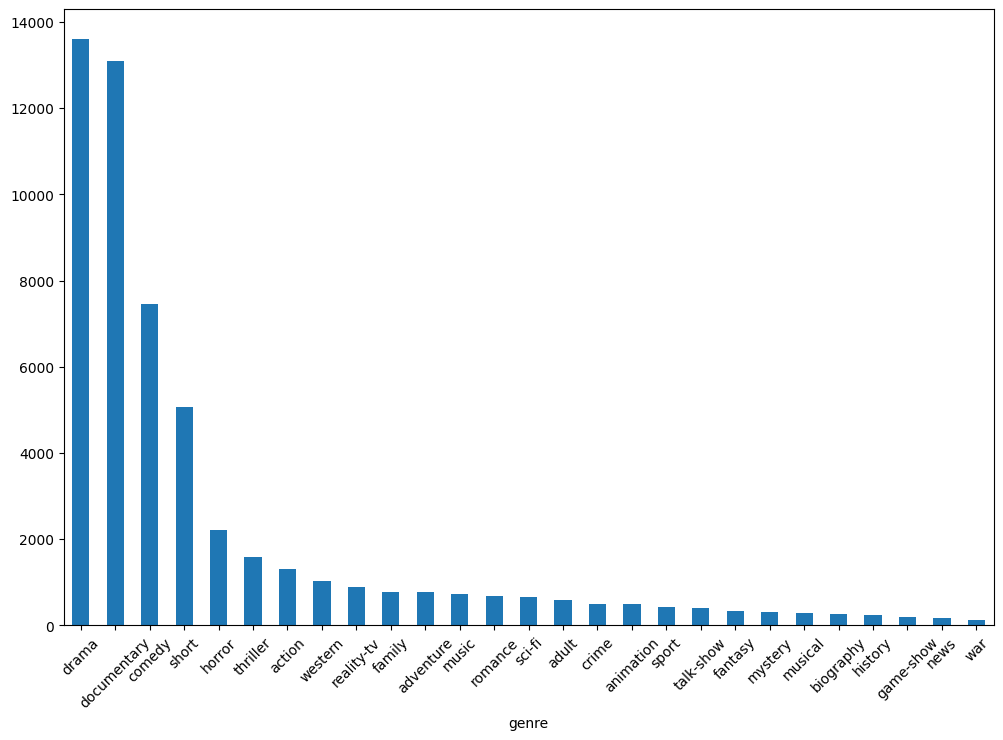

In [17]:
barplot(test_data)

In [18]:
train_data=pd.read_csv('cleaned_train.csv')

In [19]:
test_data =pd.read_csv('cleaned_test.csv')

In [20]:
test_data

Unnamed: 0                             movie          genre  \
0               1             Edgar's Lunch (1998)       thriller    
1               2         La guerra de papá (1977)         comedy    
2               3      Off the Beaten Track (2010)    documentary    
3               4           Meu Amigo Hindu (2015)          drama    
4               5                Er nu zhai (1955)          drama    
...           ...                               ...            ...   
54195       54196   "Tales of Light & Dark" (2013)         horror    
54196       54197      Der letzte Mohikaner (1965)        western    
54197       54198              Oliver Twink (2007)          adult    
54198       54199                Slipstream (1973)          drama    
54199       54200        Curitiba Zero Grau (2010)          drama    

                                             description  
0      brane love life car apart job especi girlfrien...  
1      spain march quico naughti child three belong w...  
2      one year life albin famili shepherd north tran...  
3      father die spoken brother year seriou cancer d...  
4      known intern martial art superstar bruce lee a...  
...                                                  ...  
54195  cover multipl genr tale light dark antholog we...  
54196  alic cora munro attempt find father british of...  
54197  movi year make oliv twist art dodger fagin lov...  
54198  popular mysteri rock mike mallard askew broadc...  
54199  curitiba citi movement rhythm differ pulsat gr...  

[54200 rows x 4 columns]

In [21]:
train_data.duplicated().sum()

0

In [22]:
test_data.duplicated().sum()

0

In [23]:
from wordcloud import WordCloud
def word_cloud(data):
    all_desc=' '.join(data['description'])
    wordcloud=WordCloud(height=400,width=800,background_color='white').generate(all_desc)
    plt.figure(figsize=(10,5))
    plt.title('Word cloud of movie descriptions')
    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

In [24]:
word_cloud(train_data)

TypeError: 'str' object is not callable

<Figure size 1000x500 with 0 Axes>

In [ ]:
x=train_data['description']
y=train_data['genre']
x_test=test_data['description']
y_test=test_data['genre']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train

In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(x_test)
X_valid=vectorizer.transform(X_valid)


In [ ]:
X_train

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [ ]:
import warnings
import joblib
warnings.filterwarnings('ignore')
from time import time

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'Random Forest': RandomForestClassifier(),
}

In [ ]:
results={}
model={}
def evl_model(xtrain,ytrain,xtest,ytest):
    for name,mod in models.items():
        print('Model:'+name)
        print('_'*30)
        model[name]=mod
        start=time()
        model[name].fit(xtrain,ytrain)
        y_pred=model[name].predict(xtest)
        end=time()
        results[name] = classification_report(ytest, y_pred, output_dict=True)
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)
    return model,results

In [ ]:
# Test using Validation Dataset
l_models,result=evl_model(X_train,y_train,X_valid,y_valid)

In [ ]:
reg_model=LogisticRegression(max_iter=1000)

In [ ]:
#Logistic Regression model training

print('Model:Logistic Regression')
print('_'*30)
start=time()
reg_model.fit(X_train,y_train)
y_pred=reg_model.predict(X_valid)
end=time()
#Logistic Regression Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

In [ ]:
svm_model=SVC()

In [ ]:
#SVM model training
print('Model:SVM')
print('_'*30)
start=time()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_valid)
end=time()
#SVM Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

In [ ]:
test_models = {
    'Logistic Regression': reg_model,
    'SVM':svm_model
}

In [ ]:
def test_model(xtest,ytest):
    for name,model in test_models.items():
        print('Model:'+name)
        print('_'*30)
        start=time()
        y_pred=model.predict(xtest)
        end=time()
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)

In [ ]:
#test dataset test
test_model(X_test,y_test)